         level     count       mean        std    min    25%    50%    75%   
0  0 (1_Start)  100000.0   18.36945  10.074810    1.0    9.0   20.0   30.0  \
1  1 (2_Start)  100000.0   26.83714   6.609573    2.0   25.0   30.0   30.0   
2  2 (3_Start)  100000.0   51.48603  15.387272    4.0   41.0   50.0   60.0   
3  3 (4_Start)  100000.0   92.25183  22.976507   23.0   77.0   90.0  105.0   
4  4 (5_Start)  100000.0  147.02605  29.974292   41.0  126.0  144.0  165.0   
5   5 (1_Fire)  100000.0  174.30951  32.909014   71.0  151.0  171.0  194.0   
6   6 (2_Fire)  100000.0  201.62339  35.612041   90.0  177.0  198.0  223.0   
7   7 (3_Fire)  100000.0  242.57980  39.205842  119.0  215.0  239.0  266.0   
8   8 (4_Fire)  100000.0  283.51470  42.527831  129.0  254.0  280.0  310.0   
9   9 (5_Fire)  100000.0  338.15438  46.524392  148.0  305.0  334.0  367.0   

     max  
0   30.0  
1   74.0  
2  152.0  
3  231.0  
4  339.0  
5  389.0  
6  420.0  
7  474.0  
8  560.0  
9  632.0  


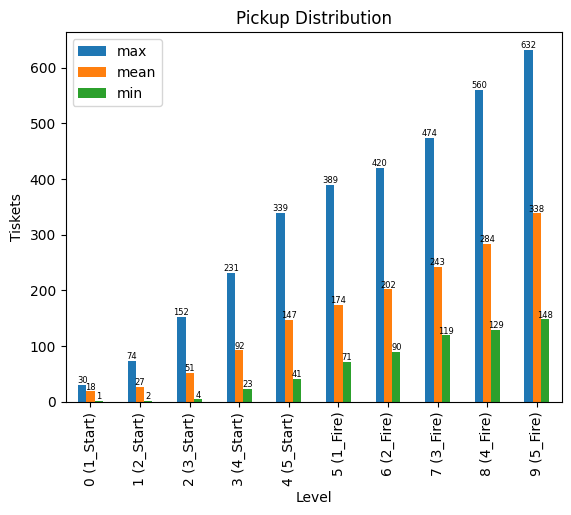

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from concurrent.futures import ProcessPoolExecutor
import pickup_hero

def main():
    results = np.array([[0, 0, 0]], dtype=object)
    with ProcessPoolExecutor() as executor:
        for r in executor.map(pickup_hero.pickup, [0] * 100000):
            results = np.append(results, r, 0)

    results = np.delete(results, 0, 0)

    df = pd.DataFrame(results, columns=['level', 'tickets', 'fragments'])
    df[['tickets', 'fragments']] = df[['tickets', 'fragments']].apply(pd.to_numeric)
    df_describe = df.groupby(['level'])['tickets'].describe().reset_index()
    print(df_describe)

    pivot_table = pd.pivot_table(df_describe, values=['mean', 'min', 'max'], index=['level'], dropna=True)
    ax = pivot_table.plot(kind='bar', xlabel='Level', ylabel='Tiskets', title='Pickup Distribution')

    for i in ax.containers:
        ax.bar_label(i, label_type='edge', fontsize=6, labels=[int(round(val)) for val in i.datavalues])

    plt.show()

if __name__ == '__main__':
    main()